# CIFAR_10

I choose CIFAR 10 dataset to experiment my deep learning theory for the below reasons

1.CIFAR 10 is a bit challenging since it has 60K images, which is a lot for a begginer.

2.The images are compressed so that they can be trained with less computational power.

3.CIFAR 10 is very popular so that if I was struck at some point I can easily get lot of help from community.

4.I dont need to deal with the hasle of downloading and handeling the data by writing python code. The data is readily available in keras datasets so that I can focus on the deep learning algorithm rather than the data cleaning.

# Keras

I choose Keras as my deep learning framework since it is begginer friendly and the learning keras is very easy. Also lots and lots of online tutorials or articles are written in Keras so its easy to get out if you are struck somewhere. In this notebook you see me using tensorflow.keras instead of keras directly. Either ways its okay, feel free to use tensorflow.keras or keras directly .

# Import Dependencies

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix,classification_report
import pickle

# Import Data

In [10]:
(xtrain,ytrain),(xtest,ytest)=keras.datasets.cifar10.load_data()

# EDA

In [11]:
print(f"The shape of xtrain is {xtrain.shape}")
print(f"The shape of ytrain is {ytrain.shape}")
print(f"The shape of xtest is {xtest.shape}")
print(f"The shape of ytest is {ytest.shape}")

The shape of xtrain is (50000, 32, 32, 3)
The shape of ytrain is (50000, 1)
The shape of xtest is (10000, 32, 32, 3)
The shape of ytest is (10000, 1)


In [33]:
c={0:'airplane',1:'automobile',2:'bird',3:'cat',4:'deer',5:'dog',6:'frog',7:'horse',8:'ship',9:'truck'}

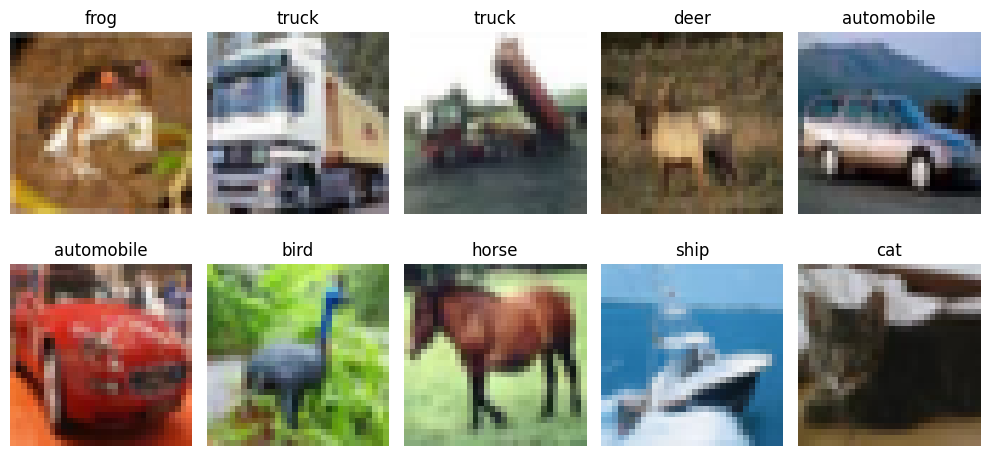

In [52]:
num_cols = 2  # Number of columns for side-by-side images
num_rows = -(-10 // num_cols)
# Create a figure with subplots arranged side by side
fig, axes = plt.subplots(num_cols, num_rows, figsize=(10, 5))

axes = axes.flatten()
# Iterate through images and plot them side by side
for i in range(10):  
    axes[i].imshow(xtrain[i])  # Plot the image in the respective subplot
    axes[i].set_title(f'{c[int(ytrain[i])]}')  # Set title for each image
    axes[i].axis('off')  # Turn off axis for cleaner visualization


plt.tight_layout()

# Show the plots
plt.show()

# Training the data using tensorflow and keras

In [66]:
xtrain1=xtrain/255.0
xtest1=xtest/255.0
ytrain1=keras.utils.to_categorical(ytrain,num_classes=10)
ytest1=keras.utils.to_categorical(ytest,num_classes=10)

In [129]:
model=keras.Sequential([
    keras.layers.Conv2D(128,(3,5),padding='same',activation='relu',input_shape=(32,32,3)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(128,(3,3),padding='same',activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(128,(1,1),padding='same',activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.BatchNormalization(),
    keras.layers.Flatten(),
    keras.layers.Dense(512,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(512,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(512,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10,activation='softmax')
])
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_41 (Conv2D)          (None, 32, 32, 128)       5888      
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 16, 16, 128)      0         
 g2D)                                                            
                                                                 
 batch_normalization_40 (Bat  (None, 16, 16, 128)      512       
 chNormalization)                                                
                                                                 
 conv2d_42 (Conv2D)          (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 8, 8, 128)        0         
 g2D)                                                            
                                                     

In [94]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [97]:
history=model.fit(xtrain1,ytrain1,validation_split=0.2,epochs=30)

Epoch 1/30
1250/1250 [==============================] - 93s 75ms/step - loss: 0.1586 - accuracy: 0.9523 - val_loss: 1.0921 - val_accuracy: 0.7479
Epoch 2/30
1250/1250 [==============================] - 94s 75ms/step - loss: 0.1413 - accuracy: 0.9567 - val_loss: 1.1377 - val_accuracy: 0.7399
Epoch 3/30
1250/1250 [==============================] - 96s 77ms/step - loss: 0.1486 - accuracy: 0.9551 - val_loss: 1.1493 - val_accuracy: 0.7437
Epoch 4/30
1250/1250 [==============================] - 94s 75ms/step - loss: 0.1300 - accuracy: 0.9601 - val_loss: 1.1636 - val_accuracy: 0.7464
Epoch 5/30
1250/1250 [==============================] - 94s 75ms/step - loss: 0.1305 - accuracy: 0.9604 - val_loss: 1.1816 - val_accuracy: 0.7489
Epoch 6/30
1250/1250 [==============================] - 94s 75ms/step - loss: 0.1261 - accuracy: 0.9625 - val_loss: 1.5146 - val_accuracy: 0.6818
Epoch 7/30
1250/1250 [==============================] - 94s 75ms/step - loss: 0.1196 - accuracy: 0.9642 - val_loss: 1.3620 -

# Evaluating the model

In [134]:
loss,accuracy=model1.evaluate(xtest1,ytest1)
print(f"Accuracy is {np.round(accuracy*100,2)} %\nLoss is {np.round(loss,2)} %")

313/313 [==============================] - 5s 17ms/step - loss: 1.3699 - accuracy: 0.7719
Accuracy is 77.19 %
Loss is 1.37 %


In [98]:
history

In [99]:
history.history

{'loss': [0.15855851769447327,
  0.14132079482078552,
  0.1485823094844818,
  0.1299891173839569,
  0.13054721057415009,
  0.1260521411895752,
  0.1195809543132782,
  0.11774297058582306,
  0.11512268334627151,
  0.11637893319129944,
  0.10276124626398087,
  0.10594992339611053,
  0.10744300484657288,
  0.10138828307390213,
  0.10007944703102112,
  0.0956912636756897,
  0.09070190787315369,
  0.08990208059549332,
  0.09200342744588852,
  0.09359891712665558,
  0.08260457962751389,
  0.09677905589342117,
  0.07298145443201065,
  0.09108702093362808,
  0.08222004771232605,
  0.0849609300494194,
  0.07733164727687836,
  0.08434418588876724,
  0.0727439671754837,
  0.07841818779706955],
 'accuracy': [0.9523249864578247,
  0.9567499756813049,
  0.9550750255584717,
  0.960099995136261,
  0.9604250192642212,
  0.9624999761581421,
  0.9641749858856201,
  0.9648249745368958,
  0.9652000069618225,
  0.9655500054359436,
  0.9694499969482422,
  0.9675250053405762,
  0.9690750241279602,
  0.9698749

# Loss VS Valuation_loss

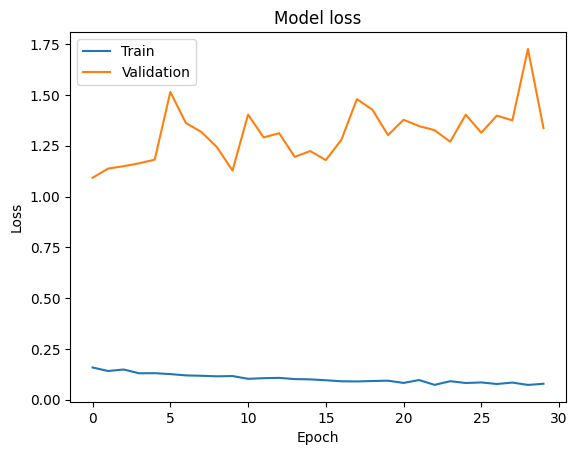

In [114]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Accuracy VS valuation_Accuracy

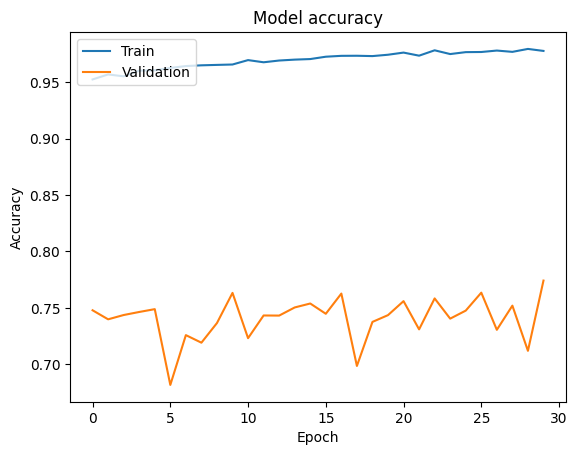

In [115]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

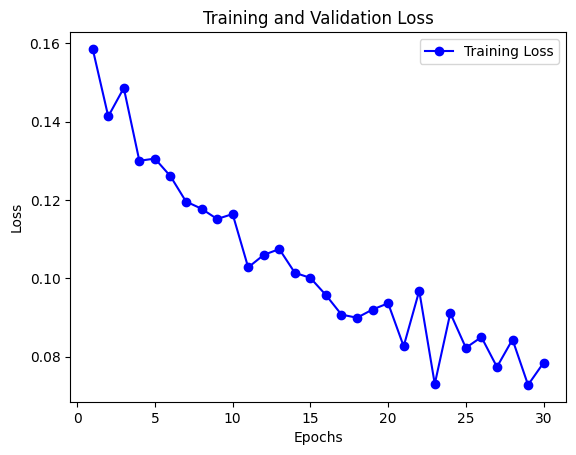

In [123]:
training_loss = history.history['loss']

# Number of epochs
epochs = range(1, len(training_loss) + 1)

# Plotting loss vs number of epochs
plt.plot(epochs, training_loss, 'bo-', label='Training Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

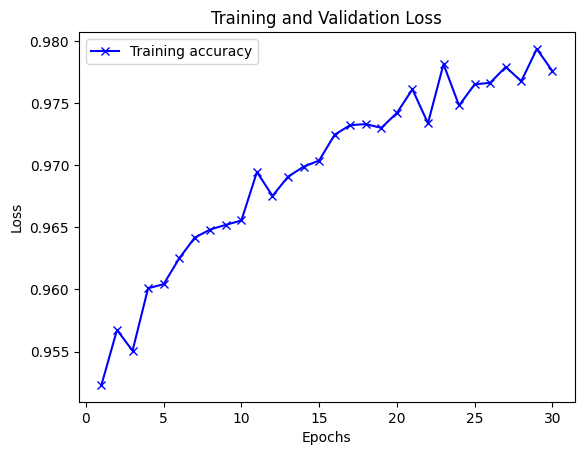

In [126]:
training_accuracy = history.history['accuracy']

# Number of epochs
epochs = range(1, len(training_loss) + 1)

# Plotting loss vs number of epochs
plt.plot(epochs, training_accuracy, 'bx-', label='Training accuracy')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Heatmap

313/313 [==============================] - 6s 17ms/step


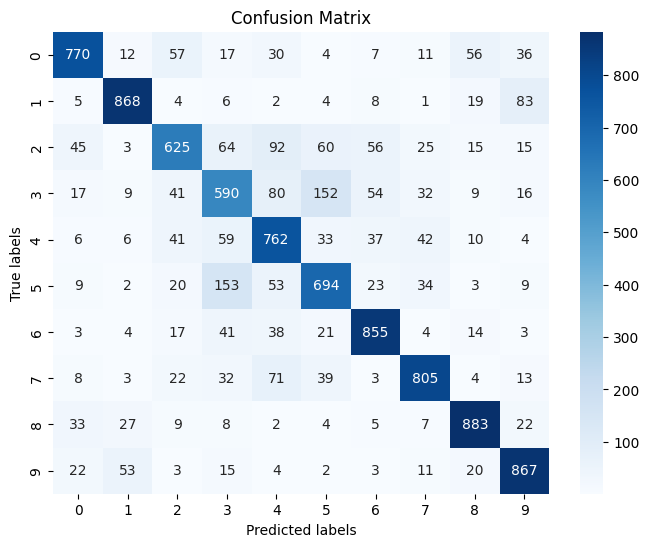

In [117]:
y_pred = model.predict(xtest1)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(ytest1, axis=1)

# Create confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Saving the Model

In [120]:
pickle.dump(model,open("cifar10.pkl","wb"))